In [1]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [29]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
data = pd.read_csv('Amazon.csv') #attach Amazon data to a var called data
# can also include a http addy in there.... 
print(data.shape) #print data rows and columns
data.head(5) #limit data to 5 rows including a header row 

(455000, 13)


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful
0,138806,138807,B000E63LME,A1CQGW1AOD0LF2,"Alena K. ""Alena""",1,2,2,1294185600,Not as pictured.,I was looking forward to try cranberry apple f...,0.5,False
1,469680,469681,B004ZIH4KM,A37S7U1OX2MCWI,Becky Cole,0,0,5,1349740800,seeds,"TY for everything. The seeds arrived quickly,...",NaN,False
2,238202,238203,B003ZXE9QA,A2OM6G73E64EQ9,jeff,0,0,5,1329264000,I'm addicted!,I've finally found the best cereal in the worl...,NaN,False
3,485307,485308,B001RVFERK,A25W349EE97NBK,Tangent4,1,1,4,1248307200,I wanted to love these...,I originally bought these chips because I'd he...,1.0,False
4,375283,375284,B000OQZNTS,A3CPPW0HUC07YS,Amy Nicolai,0,0,5,1333238400,Excellent chamomile tea,"Really excellent tea, flowers are visible in t...",NaN,False


In [31]:
data.tail()


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,repeatTxt,nameNumb,nameQuestion,nameAsterick,nameAnd,nameSemi,nameColon,nameAt,nameDolla,repeatProfile
454995,457613,457614,B008Z5L2MW,A2W7HYIQWAJ091,"Bonnie Pierce ""TexasBonnieBelle""",0,0,5,1349049600,Outstanding - what else?,...,False,False,False,False,False,False,False,False,True,True
454996,283509,283510,B0045Z4JAI,AZ3GK5ZX3SVKT,gsue,2,2,2,1306195200,"Too weak, not enough umph!",...,True,False,False,False,False,False,False,False,True,True
454997,292569,292570,B001BM68S4,A359CZWDE8MPMF,LC,0,0,5,1314576000,Good Stuff,...,False,False,False,False,False,False,False,False,True,True
454998,156159,156160,B002YLG5MA,A1V8J8FKBZW68K,"Ansella Adams ""Valley Lady""",4,4,5,1275350400,Way to Start the Day!,...,False,False,False,False,False,False,False,False,True,False
454999,119066,119067,B004IREFUM,A1MYYCC9BSYV5Y,Colorado Mom,0,0,5,1338422400,Delicious,...,True,False,False,False,False,False,False,False,True,True


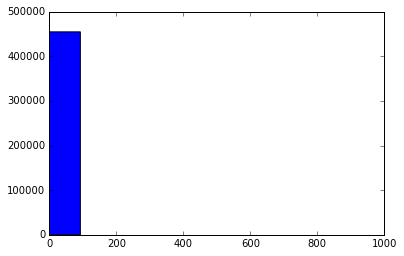

In [17]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(data["HelpfulnessDenominator"])

# Show the plot.
plt.show()

In [3]:
#smData = data[0:1000] #make a variabe for data subset limited to first 1000 
#smData.shape #show how many rows and columns we have
#print(smData.shape) #print data rows and columns
#smData.head(5) #limit data to 5 rows including a header row 

In [4]:
# features from Amazon.csv to add to feature set

# Features pulled from review txt
data['reviewLen'] = data['Text'].str.len() #captures the amount of strings present in the review (i.e. review length)
data['hasEP'] = data['Text'].str.contains('!') #captures the presences of an exclaimation point

# 1st Attempt to add punctuation 
data['hasSemi'] = data['Text'].str.contains(';') #captures the presences of a ;
data['hasColon'] = data['Text'].str.contains(':') #captures the presences of a :
data['hasAt'] = data['Text'].str.contains('@') #captures the presences of a @
data['hasDolla'] = data['Text'].str.contains('$') #captures the presences of a $
data['hasNumb'] = data['Text'].str.contains('#') #captures the presences of a #
data['hasAnd'] = data['Text'].str.contains('&') #captures the presences of a &

# 2nd Attempt adding punctuation that needs \ before (error the first time)
data['hasQuestion'] = data['Text'].str.contains('\?') #captures the presences of a ?
data['hasAsterick'] = data['Text'].str.contains('\*') #captures the presences of a *
data['hasFparenthesis'] = data['Text'].str.contains('\(') #captures the presences of a (
data['hasBparenthesis'] = data['Text'].str.contains('\)') #captures the presences of a )

# add counts for punctuation 
data['epCount'] = data['Text'].str.count('!')
data['semiCount'] = data['Text'].str.count(':')
data['atCount'] = data['Text'].str.count('@')
data['dollaCount'] = data['Text'].str.count('$')
data['numbCount'] = data['Text'].str.count('#')
data['andCount'] = data['Text'].str.count('&')
data['questionCount'] = data['Text'].str.count('\?')
data['asterickCount'] = data['Text'].str.count('\*')
data['fParenthesisCount'] = data['Text'].str.count('\(')
data['bParenthesisCount'] = data['Text'].str.count('\)')

# add punctuation count and ratio of punctuation to words -- thank you jon!
data['punctuationCount'] = data['Text'].str.count('[.,!;:()/\?-@#$&]') #captures total common punctuation count
data['punctuationToWords'] = data['punctuationCount'] / data['reviewLen'] #captures ratio of punctuation to words

# add certain words

# find repeating reviews
data['repeatTxt'] = data.duplicated('Text')

# add vars from profile name 
data['nameNumb'] = data['ProfileName'].str.contains('#') #captures profile name with a number sign
data['nameQuestion'] = data['ProfileName'].str.contains('\?')#captures profile name with a question mark
data['nameAsterick'] = data['ProfileName'].str.contains('\*') #captures profile name with an asterick
data['nameAnd'] = data['ProfileName'].str.contains('&') #captures the presences of a &
data['nameSemi'] = data['ProfileName'].str.contains(';') #captures the presences of a ;
data['nameColon'] = data['ProfileName'].str.contains(':') #captures the presences of a :
data['nameAt'] = data['ProfileName'].str.contains('@') #captures the presences of a @
data['nameDolla'] = data['ProfileName'].str.contains('$') #captures the presences of a $

# finding repeating profile names 
data['repeatProfile'] = data.duplicated('ProfileName')


In [5]:
# Taking values and making vectors
XScore = data.iloc[:, 7].values.reshape(data.shape[0], 1)
XreviewLen = data.iloc[:, 13].values.reshape(data.shape[0], 1)
XhasEP = data.iloc[:, 14].values.reshape(data.shape[0], 1)
XhasSemi = data.iloc[:, 15].values.reshape(data.shape[0], 1)
XhasColon = data.iloc[:, 16].values.reshape(data.shape[0], 1)
hasAt = data.iloc[:, 17].values.reshape(data.shape[0], 1)
hasDolla = data.iloc[:, 18].values.reshape(data.shape[0], 1)
hasNumb = data.iloc[:, 19].values.reshape(data.shape[0], 1)
hasAnd = data.iloc[:, 20].values.reshape(data.shape[0], 1)
hasQuestion = data.iloc[:, 21].values.reshape(data.shape[0], 1)
hasAsterick = data.iloc[:, 22].values.reshape(data.shape[0], 1)
hasFparenthesis = data.iloc[:, 23].values.reshape(data.shape[0], 1)
hasBparenthesis = data.iloc[:, 24].values.reshape(data.shape[0], 1)
epCount = data.iloc[:, 25].values.reshape(data.shape[0], 1)
semiCount = data.iloc[:, 26].values.reshape(data.shape[0], 1)
atCount = data.iloc[:, 27].values.reshape(data.shape[0], 1)
dollaCount = data.iloc[:, 28].values.reshape(data.shape[0], 1)
numbCount = data.iloc[:, 29].values.reshape(data.shape[0], 1)
andCount = data.iloc[:, 30].values.reshape(data.shape[0], 1)
questionCount = data.iloc[:, 31].values.reshape(data.shape[0], 1)
asterickCount = data.iloc[:, 32].values.reshape(data.shape[0], 1)
fParenthesisCount = data.iloc[:, 33].values.reshape(data.shape[0], 1)
bParenthesisCount = data.iloc[:, 34].values.reshape(data.shape[0], 1)
punctuationCount = data.iloc[:, 35].values.reshape(data.shape[0], 1)
punctuationToWords = data.iloc[:, 36].values.reshape(data.shape[0], 1)
repeatTxt = data.iloc[:, 37].values.reshape(data.shape[0], 1)
nameNumb = data.iloc[:, 38].values.reshape(data.shape[0], 1)
nameQuestion = data.iloc[:, 39].values.reshape(data.shape[0], 1)
nameAsterick = data.iloc[:, 40].values.reshape(data.shape[0], 1)
nameAnd = data.iloc[:, 41].values.reshape(data.shape[0], 1)
nameSemi = data.iloc[:, 42].values.reshape(data.shape[0], 1)
nameColon = data.iloc[:, 43].values.reshape(data.shape[0], 1)
nameAt = data.iloc[:, 44].values.reshape(data.shape[0], 1)
nameDolla = data.iloc[:, 45].values.reshape(data.shape[0], 1)
repeatProfile = data.iloc[:, 46].values.reshape(data.shape[0], 1)


Xtoadd = np.concatenate((XScore, XreviewLen, XhasEP, XhasSemi, XhasColon, hasAt, hasDolla, hasNumb, hasAnd, hasQuestion, hasAsterick, hasFparenthesis, hasBparenthesis, epCount, semiCount, atCount, dollaCount, numbCount, andCount, questionCount, asterickCount, fParenthesisCount, bParenthesisCount, punctuationCount, punctuationToWords, repeatTxt, nameNumb, nameQuestion, nameAsterick, nameAnd, nameSemi, nameColon, nameAt, nameDolla, repeatProfile), axis=1)

data.head()


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,repeatTxt,nameNumb,nameQuestion,nameAsterick,nameAnd,nameSemi,nameColon,nameAt,nameDolla,repeatProfile
0,138806,138807,B000E63LME,A1CQGW1AOD0LF2,"Alena K. ""Alena""",1,2,2,1294185600,Not as pictured.,...,False,False,False,False,False,False,False,False,True,False
1,469680,469681,B004ZIH4KM,A37S7U1OX2MCWI,Becky Cole,0,0,5,1349740800,seeds,...,False,False,False,False,False,False,False,False,True,False
2,238202,238203,B003ZXE9QA,A2OM6G73E64EQ9,jeff,0,0,5,1329264000,I'm addicted!,...,False,False,False,False,False,False,False,False,True,False
3,485307,485308,B001RVFERK,A25W349EE97NBK,Tangent4,1,1,4,1248307200,I wanted to love these...,...,False,False,False,False,False,False,False,False,True,False
4,375283,375284,B000OQZNTS,A3CPPW0HUC07YS,Amy Nicolai,0,0,5,1333238400,Excellent chamomile tea,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)

In [7]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X = hv.transform(data.Text)
X.shape

(455000, 131072)

In [8]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xfinal)

TypeError: no supported conversion for types: (dtype('O'),)

In [9]:
# define y
y = data.iloc[:, 12].values
y.shape

(455000,)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


IndexError: too many indices for array

In [10]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

     SVM        Training Set     Test Set   
-------------- -------------- --------------
    Error Rate 0.078737833595 0.120761904762
 Accuracy Rate 0.921262166405 0.879238095238
True Positives 0.448682624419 0.234236034776
True Negatives             -- 0.930264915845


(0.12076190476190476,
 0.87923809523809526,
 0.23423603477565705,
 0.93026491584514559)

In [13]:
# MODEL: logistic regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Logistic Regression')

Logistic Regression   Training Set     Test Set   
------------------- --------------- --------------
         Error Rate 0.0738775510204 0.120886446886
      Accuracy Rate   0.92612244898 0.879113553114
     True Positives  0.501937317031 0.255021484961
     True Negatives              --  0.92848616129


(0.12088644688644688,
 0.8791135531135531,
 0.25502148496052762,
 0.92848616128955752)

In [14]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

 Naive Bayes    Training Set     Test Set   
-------------- -------------- --------------
    Error Rate 0.135331240188  0.17904029304
 Accuracy Rate 0.864668759812  0.82095970696
True Positives 0.645729292234 0.370240831418
True Negatives             -- 0.856616571668


(0.17904029304029304,
 0.82095970695970699,
 0.3702408314180074,
 0.85661657166799743)

In [15]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

  Perceptron     Training Set     Test Set   
-------------- --------------- --------------
    Error Rate 0.0808069073783  0.12241025641
 Accuracy Rate  0.919193092622  0.87758974359
True Positives  0.456345789564 0.238133306685
True Negatives              -- 0.928177843833


(0.12241025641025641,
 0.87758974358974362,
 0.23813330668532029,
 0.92817784383325563)

NameError: name 'perceptron' is not defined